# Data Analysis

## Data import from the database

In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('Data_job_listings_CV_full.db')

In [3]:
query = '''
SELECT Job_listings.*, Companies.*, Locations.*
FROM Job_listings
LEFT JOIN Companies ON Job_listings.'Company ID'= Companies.Company_id
LEFT JOIN Locations ON Job_listings.'Location ID' = Locations.location_id
'''

In [4]:
df = pd.read_sql(query, conn)

In [5]:
df

,Job_id,Title,Vacancy URL,Company ID,Published,End_date,Salary Range min,Salary Range max,Location ID,company_id,Company name,Company URL,location_id,City,Region,Country
0,1,Middle/Senior Data Engineer,https://www.cv.lv/lv/vacancy/985446/it-camp/mi...,1,14.04.2023,14.05.2023,2900.0,5000.0,1,1,IT Camp,https://www.cv.lv/lv/search/employer/it-camp?e...,1,Rīga,Rīgas rajons,Latvija
1,2,Data Protection Officer,https://www.cv.lv/lv/vacancy/985792/via-sms-gr...,2,14.04.2023,14.05.2023,2000.0,3000.0,1,2,VIA SMS Group,https://www.cv.lv/lv/search/employer/via-sms-g...,1,Rīga,Rīgas rajons,Latvija
2,3,HR DATU APSTRĀDES SPECIĀLISTS/-E AR VĀCU VALOD...,https://www.cv.lv/lv/vacancy/985581/cv-online-...,3,13.05.2023,14.05.2023,1600.0,NaN,1,3,CV-Online Recruitment,https://www.cv.lv/lv/search/employer/cv-online...,1,Rīga,Rīgas rajons,Latvija
3,4,Data Engineer,https://www.cv.lv/lv/vacancy/991049/luminor-ba...,4,25.04.2023,14.05.2023,1850.0,3400.0,1,4,Luminor Bank AS Latvijas filiāle,https://www.cv.lv/lv/search/employer/luminor-b...,1,Rīga,Rīgas rajons,Latvija
4,5,DATU PĀRVALDĪBAS UN PROJEKTU KOORDINATORS,https://www.cv.lv/lv/vacancy/988313/ergo-life-...,5,11.05.2023,14.05.2023,1200.0,1500.0,1,5,ERGO Life Insurance SE Latvijas filiāle,https://www.cv.lv/lv/search/employer/ergo-life...,1,Rīga,Rīgas rajons,Latvija
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,Business Analyst in Capital Exposure Management,https://www.cv.lt/administravimo-darbai/admini...,110,08.05.2023,Nan,2680.0,4020.0,10,110,Danske Bank A/S Lietuvos filialas,Nan,10,Vilnius,Nan,Lithuania
201,202,Business Analyst in Capital Exposure Management,https://www.cv.lt/administravimo-darbai/admini...,110,05.05.2023,Nan,2680.0,4020.0,10,110,Danske Bank A/S Lietuvos filialas,Nan,10,Vilnius,Nan,Lithuania
202,203,Viešųjų finansų sistemos valdymo grupės finans...,https://www.cv.lt/teises-darbai/jaunesnysis-mo...,116,11.05.2023,Nan,NaN,NaN,10,116,Lietuvos Respublikos finansų ministerija,Nan,10,Vilnius,Nan,Lithuania
203,204,Ekonominės analizės skyriaus vyriausiasis spec...,https://www.cv.lt/valstybes-tarnyba/komunikaci...,117,04.05.2023,Nan,NaN,NaN,13,117,Valstybinė energetikos reguliavimo taryba,Nan,13,Other,Nan,Lithuania


## Data Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### Titles analysis

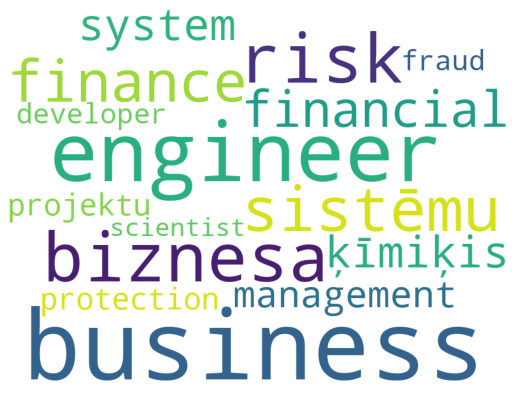

In [62]:
# wordcloud - most mentioned words in job descriptions

text = df.Title.tolist()

# defining words we not gonna consider for review:
comment_words = ''
stopwords =['data','datu','analītikis','analītiķis','analyst','e','un','ā','junior','senior','middle','specialist','vecākais'] + list(STOPWORDS)   # zodziai, kuriu neitraukti 

for val in df['Title']:
        val = str(val)     # transform column to single string
        tokens = val.split()       # slpit by word
        for i in range(len(tokens)):       # change all words to lowercase
            tokens[i] = tokens[i].lower() 
     
        comment_words += " ".join(tokens)+" "   # comnbine all words to one string

# Create wordcloud - show 15 most common words 
wordcloud = WordCloud(width = 900, height = 700,
                background_color ='white',
                stopwords = stopwords,
                max_words=15,
                min_font_size = 10).generate(comment_words)

# wordcloud to figure
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Company analysis

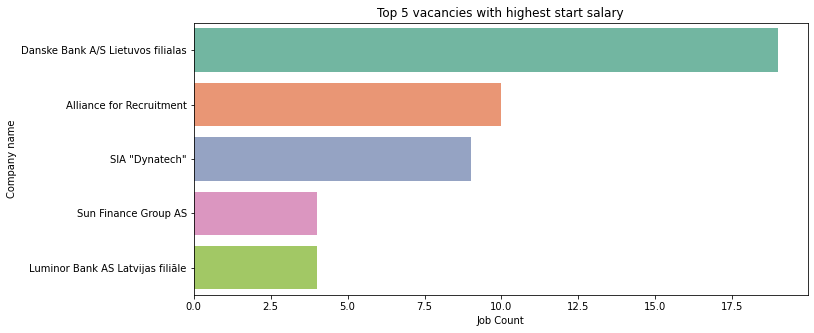

In [76]:
# Most hiring companies
company_count = df['Company name'].value_counts().reset_index().head(5)
company_count.columns = ['Company name', 'Job Count']

plt.subplots(figsize=(11,5))
sns.barplot(data=company_count,x='Job Count',y='Company name',palette='Set2').set(title="Top 5 companies with most open vacancies")
plt.show()

### Salary distribution

In [7]:
df['avg_salary'] = df[['Salary Range min', 'Salary Range max']].mean(axis=1)

In [8]:
mean_salary = df['avg_salary'].mean()
std_salary = df['avg_salary'].std()

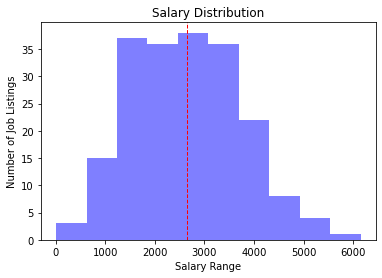

In [9]:
plt.hist(df['avg_salary'].dropna(), bins=10, alpha=0.5, color='blue')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1)
plt.title('Salary Distribution')
plt.xlabel('Salary Range')
plt.ylabel('Number of Job Listings')
plt.show()

In [45]:
# Generate statistics table for average salary column
mean_salary = df['avg_salary'].mean()

# create a table with salary statistics
stats_table = pd.DataFrame({
    'Minimum Salary': df['avg_salary'].min(),
    'Maximum Salary': df['avg_salary'].max(),
    'Average Salary': mean_salary,
    'Median Salary': df['avg_salary'].median(),
    'Standard Deviation': df['avg_salary'].std()
}, index=['Statistics'])

# style the table for better formatting
stats_table = stats_table.style.set_table_styles([{
    'selector': 'th',
    'props': [
        ('background-color', 'lightgrey'),
        ('color', 'black'),
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('border', '1px solid black'),
        ('padding', '5px')
    ]
}, {
    'selector': 'td',
    'props': [
        ('text-align', 'center'),
        ('border', '1px solid black'),
        ('padding', '5px')
    ]
}])

stats_table

,Minimum Salary,Maximum Salary,Average Salary,Median Salary,Standard Deviation
Statistics,5.500000,6150.000000,2642.697200,2637.500000,1115.300723


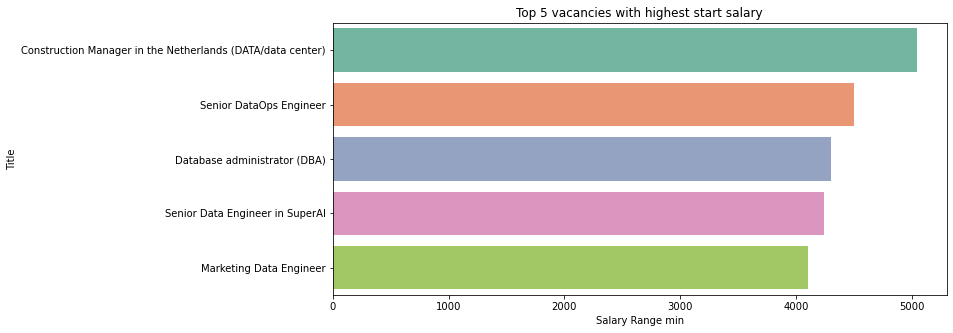

In [57]:
# Check job positions with highest starting salary 

highest_pay = df.sort_values('Salary Range min', ascending = False).head(5)

plt.subplots(figsize=(11,5))
sns.barplot(data=highest_pay,x='Salary Range min',y='Title',palette='Set2').set(title="Top 5 vacancies with highest start salary")
plt.show()

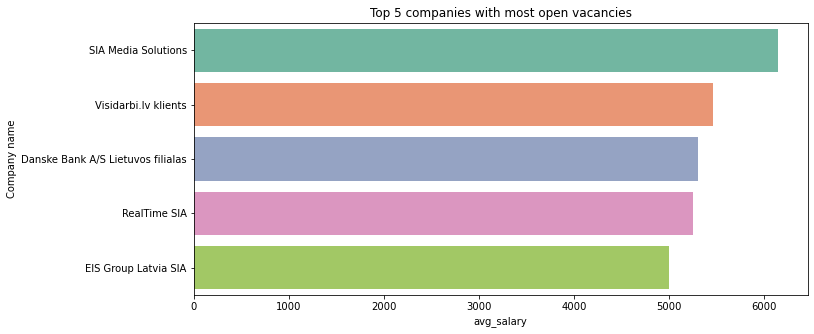

In [81]:
company_pay = df.sort_values('avg_salary', ascending = False).head(5)

plt.subplots(figsize=(11,5))
sns.barplot(data=company_pay,x='avg_salary',y='Company name',palette='Set2').set(title="Top 5 companies with highest average pay")
plt.show()

###  Job posting distribution by location

In [11]:
df_latvia = df[(df['Country'] == '\xa0Latvija') | (df['Country'] == ' Latvija')]

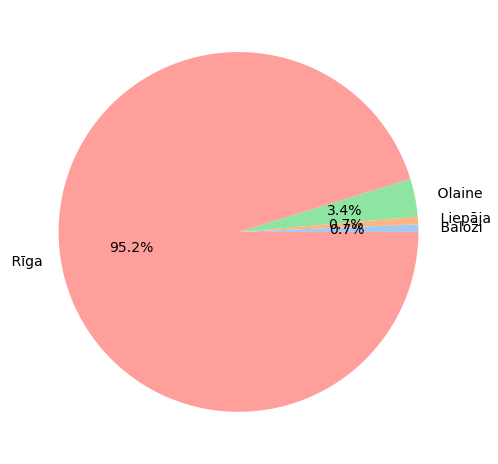

In [41]:
# group the data by city and count the number of jobs in each city
jobs_by_city = df_latvia.groupby('City')['Title'].count()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(7,7)) # set figure size
#create pie chart
plt.pie(jobs_by_city, labels=jobs_by_city.index, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

In [37]:
df_lithuania = df[(df['Country'] == 'Lithuania')]

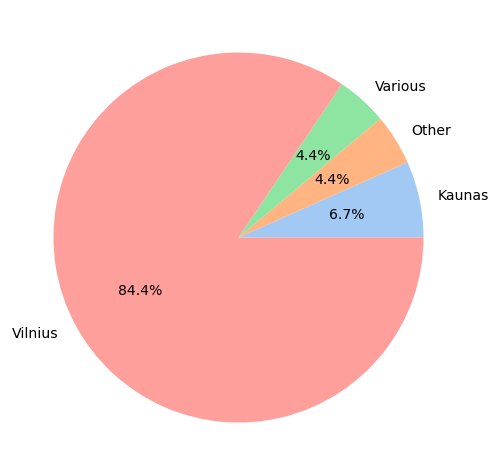

In [42]:
# group the data by city and count the number of jobs in each city
jobs_by_city = df_lithuania.groupby('City')['Title'].count()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(7,7)) # set figure size
#create pie chart
plt.pie(jobs_by_city, labels=jobs_by_city.index, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.tight_layout()
plt.show()

### 1.3 End date 

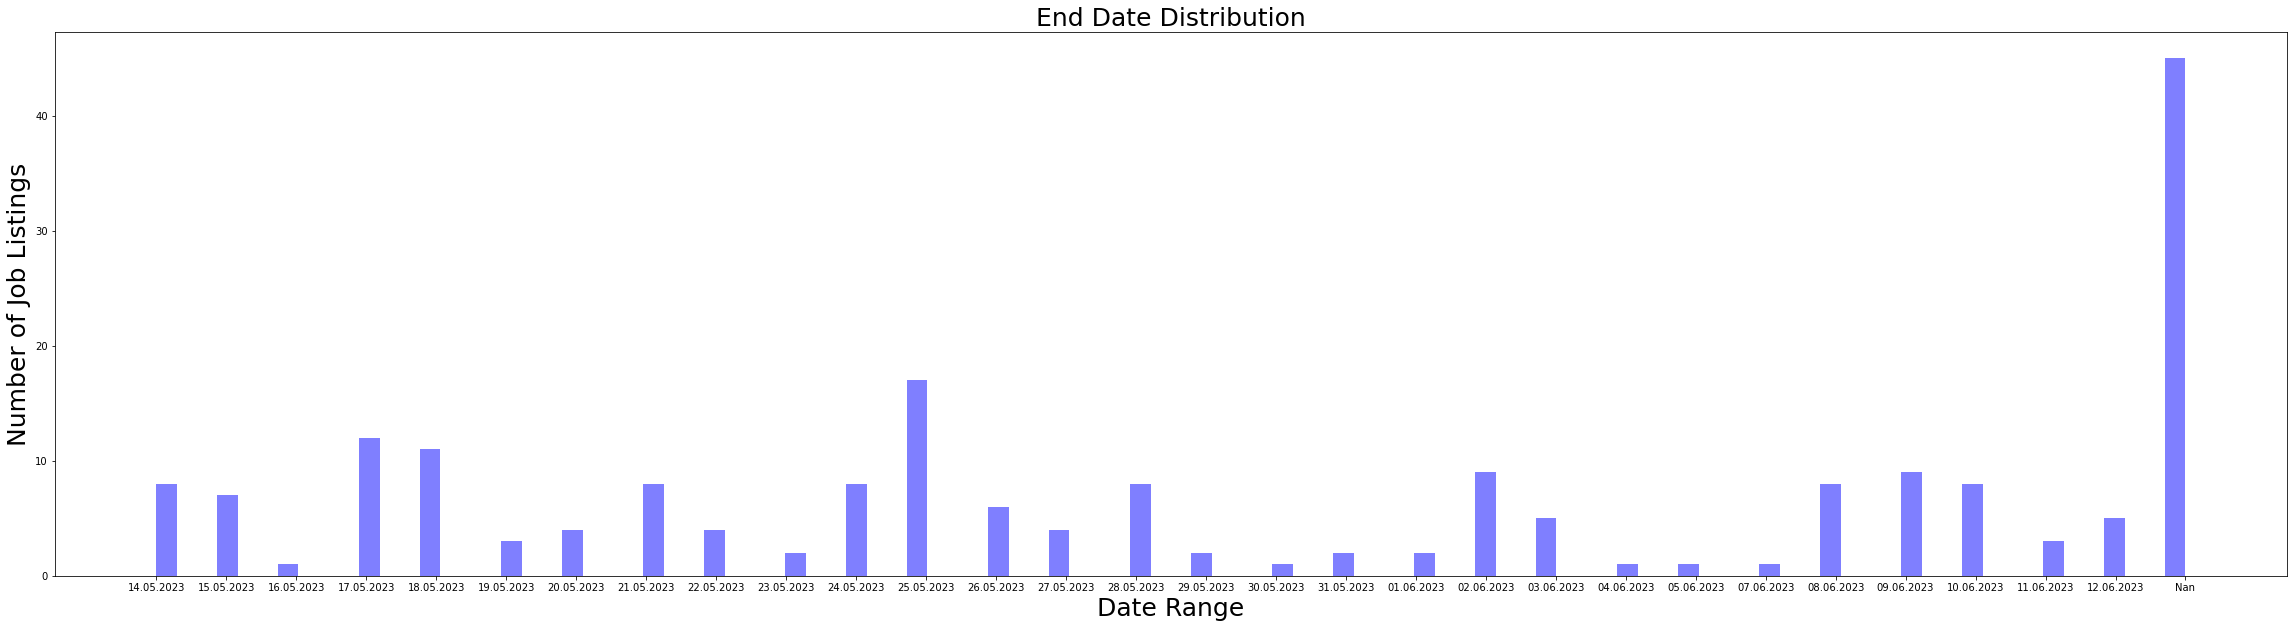

In [13]:
plt.figure(figsize=(40,10)) # set figure size
plt.hist(df['End_date'].dropna(), bins=100, alpha=0.5, color='blue')

plt.title('End Date Distribution', fontsize= 25)
plt.xlabel('Date Range',  fontsize= 25)
plt.ylabel('Number of Job Listings',  fontsize= 25)
plt.show()